## Observations and Insights 

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#look at the dimensions of the two DataFrames:
mouse_metadata.shape
study_results.shape
# Combine the data into a single dataset **left
o_merged =pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID"])


# Display the data table for preview
o_merged.head()
o_merged.shape

(1893, 8)

In [108]:
# Checking the number of mice.
no_of_mice = len(pd.value_counts(o_merged['Mouse ID']))
no_of_mice  


249

In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#create another dataset with mice id and timepoint
df1 = o_merged[['Mouse ID', 'Timepoint']]
df1

#get duplicate row on basis of mice id and timepoint
dup_Row = df1[df1.duplicated(keep='last')]
dup_Row


,Mouse ID,Timepoint
908,g989,0
910,g989,5
912,g989,10
914,g989,15
916,g989,20


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_all_row=pd.merge(o_merged,dup_Row,  on=["Mouse ID","Timepoint"])
dup_all_row
#dup_all_row.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# get names of indexes for mouse who has duplicate record
index_names =o_merged[o_merged['Mouse ID']=='g989'].index

# drop these row indexes from original combined dataset
o_merged.drop(index_names, inplace = True)
o_merged

#changed the dataset name so i dont have to replace in rest of the code
out_merged=o_merged
out_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Checking the number of mice in the clean DataFrame.
clean_no_of_mice= len(pd.value_counts(out_merged['Mouse ID']))
clean_no_of_mice  


248

## Summary Statistics

In [92]:


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby


#most efficient way
regimen_grp = out_merged.groupby(["Drug Regimen"])
sum_stat = regimen_grp.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stat


#for my learning purposes
#sort on basis of tumor volume
merge_sort = out_merged.sort_values(["Tumor Volume (mm3)"], ascending=True)
merge_sort.head()

regimen_grp = merge_sort.groupby(["Drug Regimen"])
regimen_grp

#mean of each regimen
regimen_mean = regimen_grp["Tumor Volume (mm3)"].mean()

#median of each regimen
regimen_median = regimen_grp["Tumor Volume (mm3)"].median()

#variance of each regimen
regimen_variance = regimen_grp["Tumor Volume (mm3)"].var()

#standard deviation of each regimen
regimen_std = regimen_grp["Tumor Volume (mm3)"].std()

#SEM
regimen_sem = regimen_grp["Tumor Volume (mm3)"].sem()


#total tumor volume for each regimen
tumor_volume = regimen_grp["Tumor Volume (mm3)"].sum()


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_stat = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
sum_stat




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

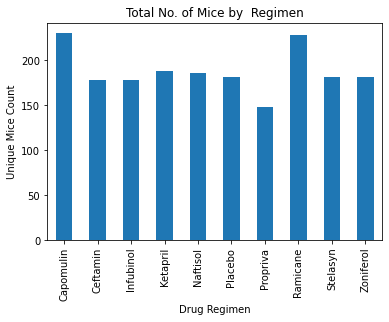

<Figure size 432x288 with 0 Axes>

In [93]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# group by  'regimen' 
bar_regimen_grp = out_merged.groupby("Drug Regimen")

# count on basis of the unique mice group by regimen
regimen_mice_cnt= bar_regimen_grp['Mouse ID'].count()

# Chart our data, give it a title, and label the axes
regimen_chart = regimen_mice_cnt.plot(kind="bar",  title="Total No. of Mice by  Regimen")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Unique Mice Count")

plt.show()
plt.tight_layout()


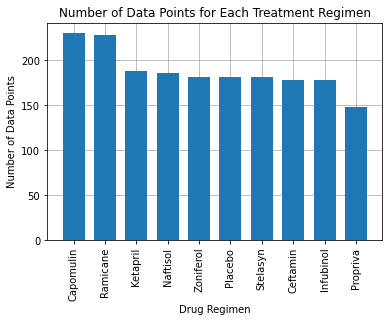

In [94]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


# Calculate the amount of data points for each drug regimen
counts = out_merged['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))


plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)


# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

# Display resulting plot
plt.show()

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
grp_gender = out_merged.groupby(["Mouse ID","Sex"])

#size counts null values too
mouse_gender_df = pd.DataFrame(grp_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = ((mouse_gender["Total Count"]/mouse_gender["Total Count"].sum())*100)

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map("{:,.2f}%".format)


#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.60%
Male,125,50.40%


Text(0, 0.5, '')

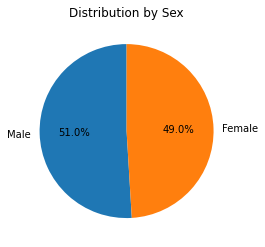

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
data = out_merged['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')

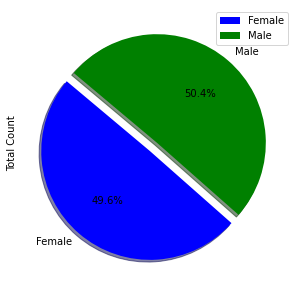

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#plot = name of the data frame .plot.pie (sumplots true)
colors = ['blue', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(out_merged.groupby('Mouse ID') .max()['Timepoint'])
max_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(out_merged, max_timepoint_df, on='Mouse ID')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    tmp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset 
    final_volume_df = tmp_df.loc[tmp_df['Timepoint_x'] == tmp_df['Timepoint_y']]
    
    # Create  final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')  

IQR for Capomulin: 7.781863460000004
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Number of Ceftamin outliers: 0


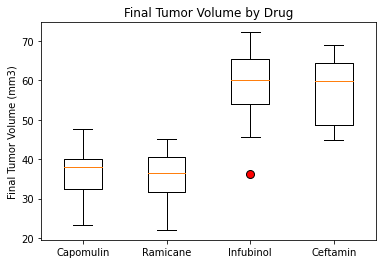

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

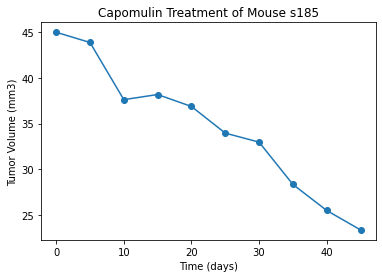

In [101]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
capmouse = out_merged.loc[out_merged['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(capmouse['Timepoint'],capmouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()


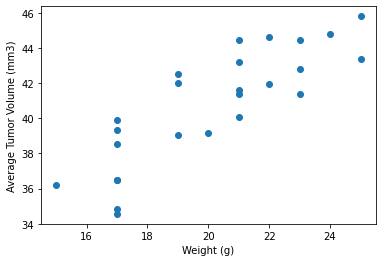

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
 
#get capomulin regimen
caps= out_merged.loc[out_merged['Drug Regimen'] == 'Capomulin']

capavg = caps.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


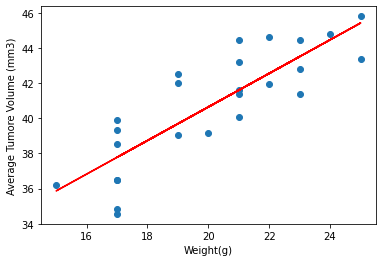

In [103]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()

